# IPL Data Analysis & Visualization
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

# Data Preparation and Cleaning

Importing Libraries for this job

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load datasets and checking the number of row and column of the dataset

In [2]:
ipl_df = pd.read_csv('data/matches.csv')
ipl_df.shape

(756, 18)

In [3]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Checking the data inside the dataframe

In [4]:
ipl_df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### As we won't analysis anything about the umpires, so drop the columns "umpire1","umpire2", "umpire3"

In [5]:
ipl_df.drop(columns=["umpire1","umpire2", "umpire3"], inplace=True)
ipl_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

### Checking some columns whether there need any change in data or not

In [6]:
ipl_df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [7]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

### From the Above Observations some Data cleaning is required
1. Pune was represented by various Team Names as 'Rising Pune Supergiant', 'Pune Warriors' & 'Rising Pune Supergiants' so as a convinience we will changes these with the recent team representing Pune 'Rising Pune Supergiant' in all columns involving this name i.e 'team1','team2','winner' & 'toss_winner' columns, similarly 2nd Change is in team name of Delhi
2. Earlier the team name for delhi was 'Delhi Daredevils' but later it was changed to 'Delhi Capitals' so we will replace the "delhi Daredevils' with 'Delhi Capitals'
3. Bangalore was Renamed as Bengaluru in 2014 so we will change the Name for City Bangalore to Bengaluru to avoid Errors in Data Analysis

In [9]:
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

### Let's check the replaced values

In [10]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [11]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [12]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

We have cleaned the dataset. Let's get to next step...

# Checking for Missing Values

In [13]:
ipl_df.isnull().sum().sum()

15

So, there are 15 Null values in our data set. Now we will search For them.

In [14]:
null_df = ipl_df[ipl_df.isna().any(axis=1)]
null_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


From Above Observations We can See NaN values in various Columns like 'city', 'winner' ,'Player Of The Match'. But By Observation it is clear the NaN Values for columns like 'Winner' and 'Player Of The Match' are only for Case When Match had "No Result" so we Can assume the Match might have been a Draw or Cancelled Due to Some Weather Or Technical Conditions. While The Other Case 'City' Column has NaN values for Rows where Stadium Location is dubai. So we will Replace These NaN values and Insert "Dubai" as City in its Place

In [15]:
ipl_df.loc[[461,462,466,468,469,474,476],'city'] = "Dubai"
ipl_df.loc[461:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
470,471,IPL-2014,Abu Dhabi,26-04-2014,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium


In [16]:
# Lets Check if any any other COlumns Have NaN values
ipl_df.isna().any()[lambda x: x]

winner             True
player_of_match    True
dtype: bool

From Above Results It is clear That we have have No NaN values Other than Those in Columns Of Winner and Player Of The Match. So We Have Now Completed With Our Data Cleaning Part and Can Move with Further Steps

# Exploratory Analysis and Visualization

## Total number of matches played in each city

In [17]:
cities = ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


Organize the datas

In [18]:
cities.rename(columns = {'id':'matches'}, inplace =True)
cities = cities.sort_values('matches', ascending =False).reset_index()
cities

,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


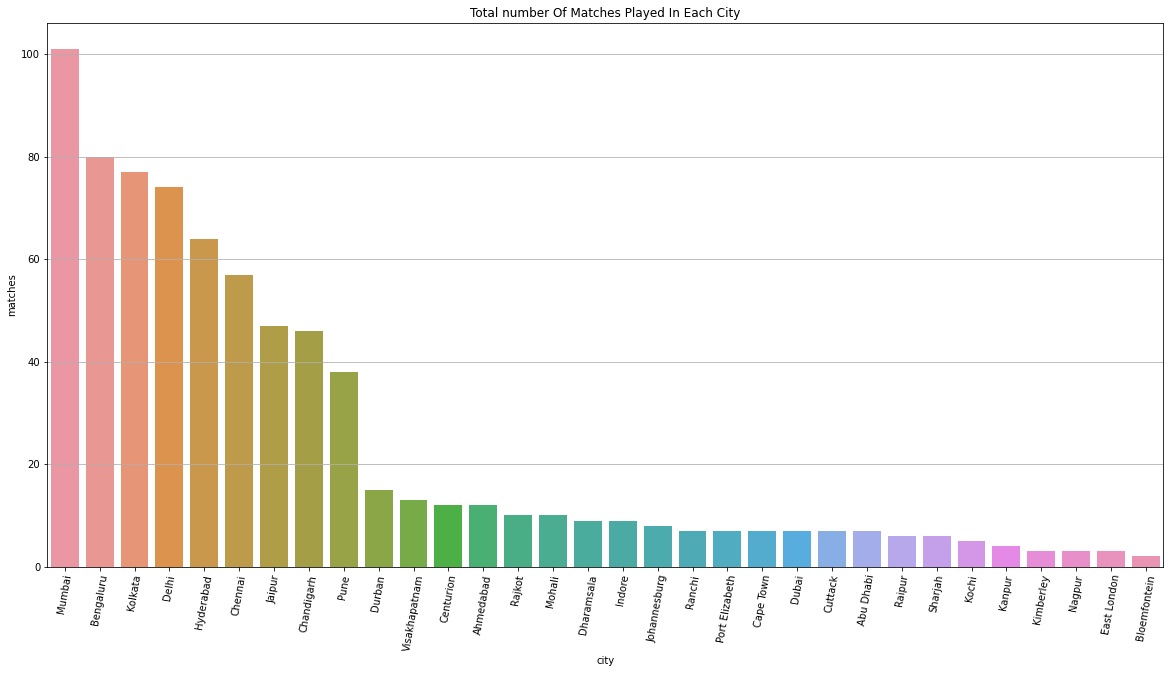

In [19]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Total number Of Matches Played In Each City')
plt.xticks(rotation='80')
sns.barplot(x='city',y='matches',data=cities);

## Total number of matches hosted by each stadium

In [20]:
venues = ipl_df.groupby('venue')[['id']].count()
venues.rename(columns = {'id':'matches'}, inplace =True)
venues = venues.sort_values('matches', ascending =False).reset_index()
venues

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


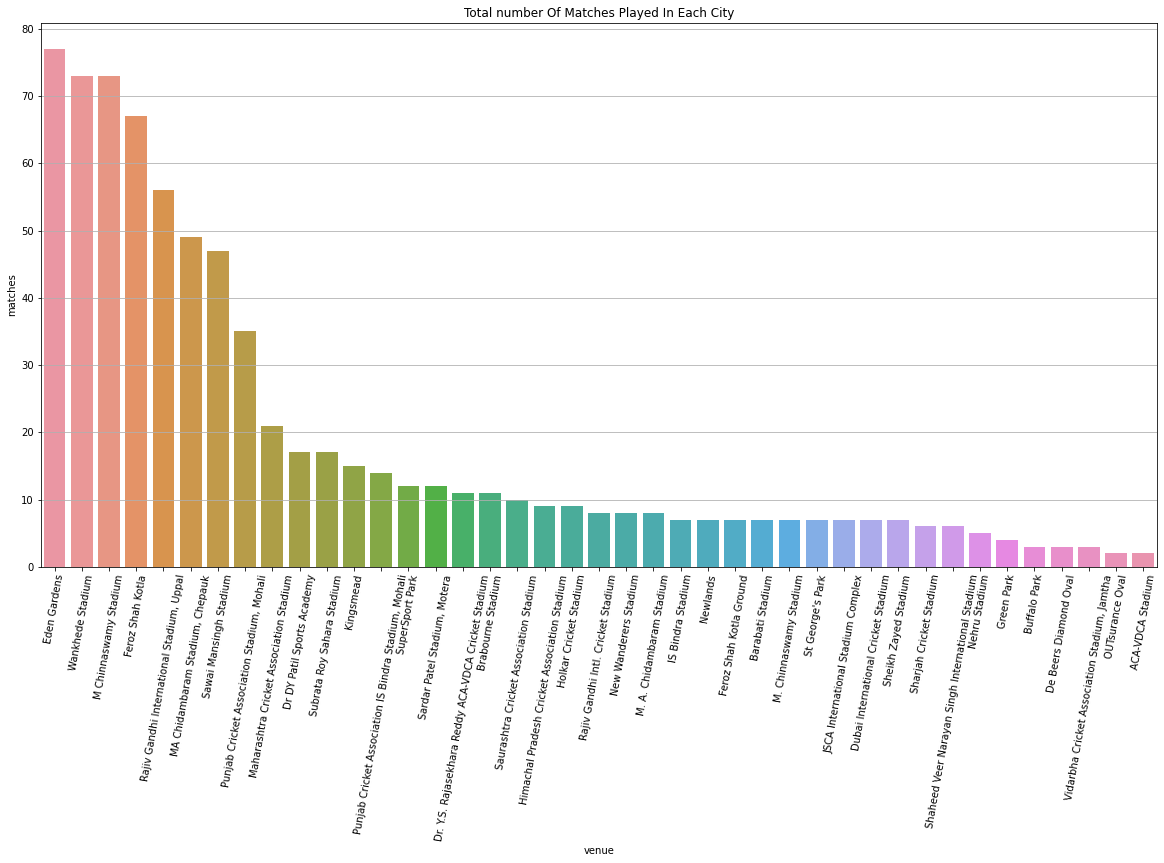

In [21]:
# Plotting the values
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Total number Of Matches Played In Each City')
plt.xticks(rotation='80')
sns.barplot(x='venue',y='matches',data=venues);

## Number of matches won by each team

In [22]:
winners = ipl_df.groupby('winner')[['id']].count()
winners = winners.sort_values('id', ascending=False).reset_index()
winners.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winners

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


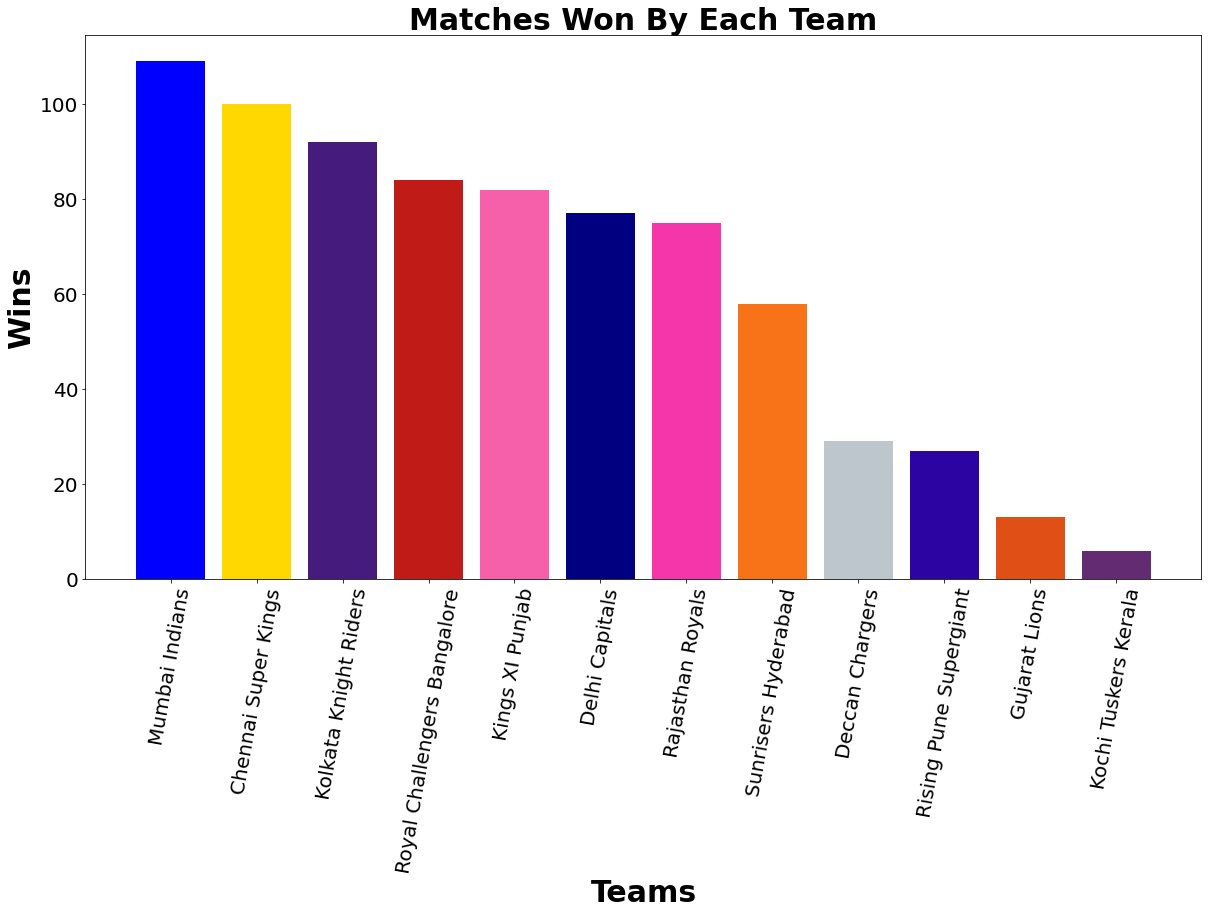

In [23]:
#Plotting Wins vs Teams
plt.figure(figsize=(20,10))
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Wins',fontweight='bold',fontsize=30)
plt.xticks(rotation=80)
plt.title('Matches Won By Each Team',fontweight='bold',fontsize=30);
plt.tick_params(labelsize=20)
plt.bar(winners.Teams,winners.wins);

# Using colour code of teams jersey to make it easily understandable
plt.bar(winners.Teams, winners.wins, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);

So, from the above Graph its clear Mumbai Indians have won most number of Matches

# Asking Interesting Questions on data
I will be asking following Questions:

1. What was the most preferred Decision On winning Toss i.e. Choose To Bat / Choose To Field

2. Which Decision has proved most beneficial i.e Field / Bat 

3. Who has been awarded with Player Of the Max maximum Number Of Times

4. Who Has Won the Ipl Trophy Most Number of Times

5. Which Season had Most Number of Matches Played

## Q1. What was the most preferred Decision On winning Toss i.e. Bat / Field?

In [24]:
# We can see toss decision is either bat/field
ipl_df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [25]:
decisions = ipl_df.groupby('toss_decision')[['id']].count()
decisions = decisions.sort_values('id').reset_index()
decisions.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decisions

,Decision,Total
0,bat,293
1,field,463


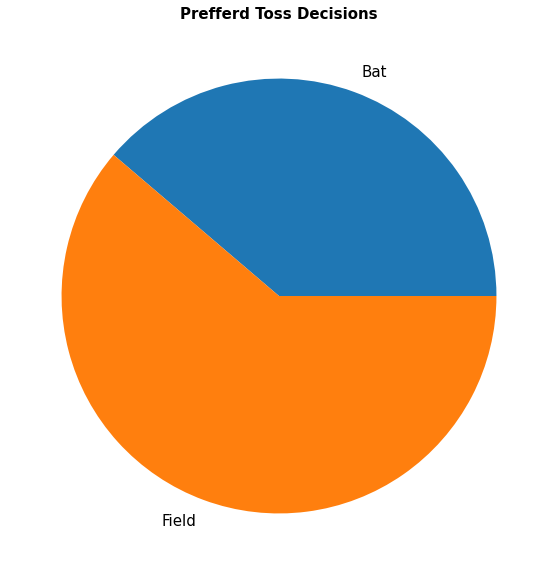

In [39]:
plt.figure(figsize=(10,10))
plt.title("Prefferd Toss Decisions",fontweight='bold',fontsize=15)
plt.tick_params(labelsize=20)
plt.pie(decisions.Total,labels=['Bat', "Field"],textprops={'fontsize': 15});

## Q2. Which Decision has proved most beneficial i.e Field / Bat?

In [27]:
choose_field_df = ipl_df.loc[(ipl_df['toss_winner']==ipl_df['winner']) & (ipl_df['toss_decision']== 'field'),['id','winner','toss_decision']]
choose_field_df

,id,winner,toss_decision
1,2,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
5,6,Sunrisers Hyderabad,field
6,7,Mumbai Indians,field
...,...,...,...
749,11345,Royal Challengers Bangalore,field
750,11346,Kings XI Punjab,field
751,11347,Mumbai Indians,field
753,11413,Delhi Capitals,field


In [28]:
choose_bat_df = ipl_df.loc[(ipl_df['toss_winner']==ipl_df['winner']) & (ipl_df['toss_decision']=='bat'), ['id','winner','toss_decision']]
choose_bat_df

,id,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat
...,...,...,...
713,11309,Chennai Super Kings,bat
729,11325,Mumbai Indians,bat
741,11337,Delhi Capitals,bat
746,11342,Mumbai Indians,bat


In [29]:
results = pd.concat([choose_field_df, choose_bat_df])
results = results.groupby('toss_decision')[['id']].count()
results = results.sort_values('id').reset_index()
results.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
results

,Decision,Total
0,bat,134
1,field,259


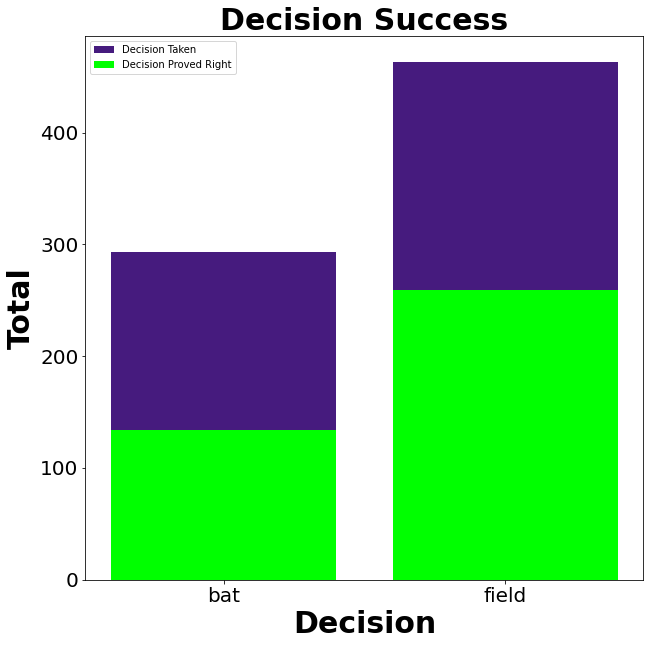

In [30]:
# Plotting the combined values
plt.figure(figsize=(10,10))
plt.title("Decision Success",fontweight='bold',fontsize=30)
plt.xlabel('Decision',fontweight='bold',fontsize=30)
plt.ylabel('Total',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.bar(decisions.Decision, decisions.Total, color=['#461B7E','#461B7E']);
plt.bar(results.Decision, results.Total, color=['#00FF00','#00FF00']);
plt.legend(['Decision Taken','Decision Proved Right']);

We can See the Fielding decision on winning toss has not only been most Preferred one But it has also proven to be a good Decision as almost 60% of the Time it is Proved Right

## Q3. Who has been awarded with Player Of the Max maximum Number Of Times?

In [31]:
players_of_the_match = ipl_df.groupby('player_of_match')[['id']].count()
players_of_the_match = players_of_the_match.sort_values('id', ascending=False).reset_index().head(10)
players_of_the_match.rename(columns={"player_of_match":"player","id":"number_of_match"},inplace=True)
players_of_the_match 

,player,number_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


Text(0.5, 0, 'Players')

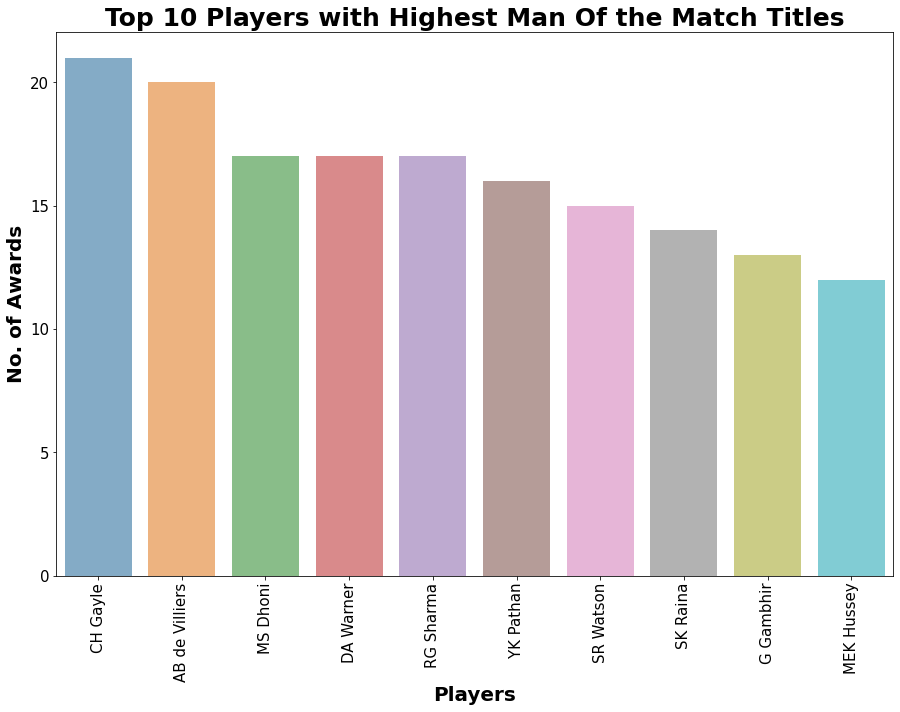

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x=players_of_the_match.player,y=players_of_the_match.number_of_match, alpha=0.6);
plt.title("Top 10 Players with Highest Man Of the Match Titles",fontweight='bold',fontsize=25 )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.tick_params(labelsize=15)
plt.ylabel('No. of Awards',fontweight='bold',fontsize=20)
plt.xlabel('Players',fontweight='bold',fontsize=20)

# Q4. Who Has Won the Ipl Trophy Most Number of Times?

We will have to extract the Final matches from the Entire Data and find the winners of those last matches.

In [33]:
final_df = ipl_df.groupby('Season').tail(1).copy()
final_df = final_df.sort_values('Season')
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [34]:
final_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

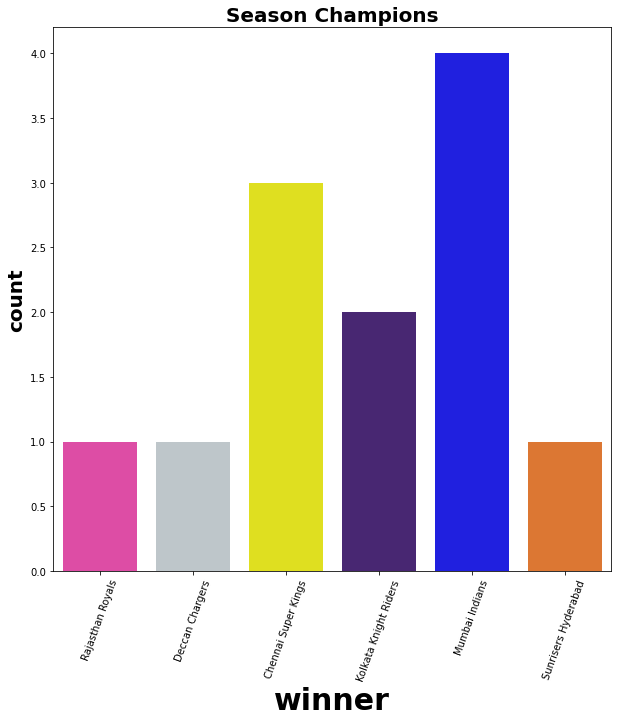

In [35]:
plt.figure(figsize=(10,10))
plt.title("Season Champions",fontweight='bold',fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Total Seasons',fontweight='bold',fontsize=20)
plt.xticks(rotation='70', fontsize=20)
plt.tick_params(labelsize=10)
sns.countplot(x=final_df['winner'],palette=['#F535AA','#BCC6CC','yellow','#461B7E','blue','#F87217']);

So We can easily verify ny visuals the Most Number of Season Champion is Mumbai Indians

## Q5. Which Season Had Most Number of Matches?

In [36]:
seasons = ipl_df.groupby('Season')[['id']].count()
seasons = seasons.sort_values('id', ascending=False).reset_index().head(10)
seasons.rename(columns={"Season":"Year","id":"Matches"},inplace=True)
seasons

,Year,Matches
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2014,60
5,IPL-2016,60
6,IPL-2018,60
7,IPL-2019,60
8,IPL-2015,59
9,IPL-2017,59


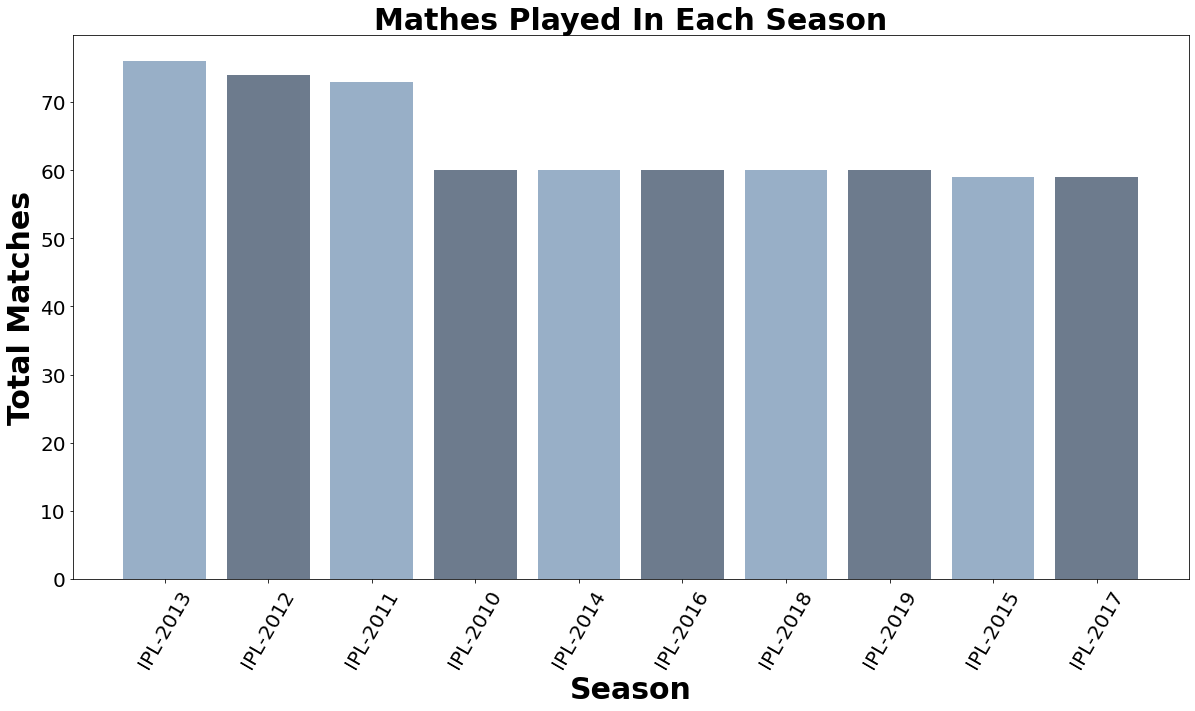

In [37]:
# Plottting the values
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(seasons.Year,seasons.Matches,color=['#98AFC7','#6D7B8D']);

So We can see IPL-2013 had witnessed most number of matches

# Inferences and Conclusion
In this analysis I used the matches.csv file from the kaggle Datasets. Following are my conclusions about it

1. A total of 756 matches have been played from 2008 - 2019
2. Out of these 756 matches 743 matches were played normally and had a normal result
3. Most number of Matches were played in Mumbai [101]
4. Mumbai Indian's Have Won the Most Number of Matches (109) followed by Chennai Super Kings with 100 Matches
5. IPL-2013 Season Hosted most Number of Matches (76)
6. Eden Gardens (Stadium) Hosted the Most Number of Matches (77) followed by wankhede Stadium (73)
7. Chris Gayle has been the Man Of The Match Most Number of Times with "21" Awards followed by AB di Villiers (20) and MS Dhoni (17)
8. Mumbai Indians Have been the IPL Champions Most number of times (4) followed by Chennai Super Kings (3)
9. Mumbai Indians and Chennai Super Kings have been the dominant Teams

# Future Work

The data set had 6 different csv Files. I will try to explore the 'Players.csv', 'Deliveries.csv' and others in detail

# References

Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

Inspired by : https://youtu.be/WYv1rjU_HM4